## Actividad 3_6

<div style="border-style:groove;border-width:thin;padding:10px">

En esta actividad vamos a intentar solucionar un problema de regresión con uno de los métodos que hemos visto en clase hasta ahora:
- Regresión Lineal Simple.
- Regresión Lineal Múltiple.
- Regresión Polinómica.
</div>

<p style="border-style:groove;border-width:thin;padding:10px">
Lo primero que vamos a hacer es importar los datos y analizar el dataset que tenemos.
</p>

In [63]:
# Importar librerias
import pandas as pd
import numpy as np
import matplotlib_inline as plt


df_car = pd.read_csv("CarPrice_Assignment.csv", sep=",")

df_car.corr(numeric_only=True)

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,1.000000,-0.151621,0.129729,0.170636,0.052387,0.255960,0.071962,-0.033930,0.260064,-0.160824,0.150276,-0.015006,-0.203789,0.015940,0.011255,-0.109093
symboling,-0.151621,1.000000,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.130051,-0.008735,-0.178515,0.070873,0.273606,-0.035823,0.034606,-0.079978
wheelbase,0.129729,-0.531954,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,0.170636,-0.357612,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920
carwidth,0.052387,-0.232919,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325
carheight,0.255960,-0.541038,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.119336
curbweight,0.071962,-0.227691,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.835305
enginesize,-0.033930,-0.105790,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.874145
boreratio,0.260064,-0.130051,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012,0.553173
stroke,-0.160824,-0.008735,0.160959,0.129533,0.182942,-0.055307,0.168790,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,-0.042145,-0.043931,0.079443


<p style="border-style:groove;border-width:thin;padding:10px">
A continuación vamos a modificar el dataset para eliminar lo que no nos interesa y cambiar las columnas para poder hacer una regresión.
    
</p>

In [64]:
# Necesitamos dividir las columnas, una columna de marca de coche y otra de modelo
df_car[["Marca", "Modelo"]] = (df_car["CarName"].str.strip().str.split(" ", n=1, expand=True))

df_car.drop(columns=["Modelo"], inplace=True)

<div style="border-style:groove;border-width:thin;padding:10px">
    Ahora comprobamos si hay valores nulos. A continuación vamos a proceder a cambiar las columnas que tienen categorías ("categorical features") para poder realizar una regresión con ellas. 
<p>Antes que nada, vamos a definir que son columnas categóricas. Son columnas cuyos datos deben pertenecer a un conjunto de valores finito. Este conjunto de valores puede ser numérico (en cuyo caso podemos usarlo directamente en una regresión) o un texto.</p>
<p>Si nos encontramos con columnas con texto, como es nuestro caso, lo más común es asignar valores numéricos a los valores de las columnas. Esta técnica se llama <b>One-hot encoding</b>. El cambio más habitual para poder realizar una regresión sería convertir la columna en varias, una por cada posible valor. Usando como ejemplo nuestro dataset, la columna <b>fueltype</b> se transformaría en 2 columnas, <b>fueltype-gas y fueltype-diesel</b>.</p>
    <p>Los posibles valores de estas columnas dependeran de la codificación que usemos:</p>
    <ul>
        <li><b>Dummy encoding:</b> Tendrán 0 o 1. En nuestro caso de ejemplo, un coche diesel tendrá 0 en fueltype-gas y 1 en fueltype-diesel.</li>
        <li><b>Simple effect encoding:</b> En vez de 0 y 1 tendrán -0,25 y 0,75. En el mismo ejemplo, el coche diesel tendría -0,25 en fueltype-gas y 0,75 en fueltype-diesel.</li>
    </ul>    
    <p>La función <b>get_dummies</b> de pandas nos permite hacer este cambio en una columa o una lista de columnas. Vamos a hacer un ejemplo con una columna y, después, a moficiar las demás.</p>
</div>

In [65]:
df_car.isna().sum() # Vemos que no hay nulos

df_dummies = pd.get_dummies(df_car)
for columna in df_dummies.columns:
    print(columna)

df_dummies.corr(numeric_only=True)["price"].sort_values(ascending=False) # La columna que tiene mas relación con precio, es de enginesize, curbweight (peso en vacio) y horsepower

car_ID
symboling
wheelbase
carlength
carwidth
carheight
curbweight
enginesize
boreratio
stroke
compressionratio
horsepower
peakrpm
citympg
highwaympg
price
CarName_Nissan versa
CarName_alfa-romero Quadrifoglio
CarName_alfa-romero giulia
CarName_alfa-romero stelvio
CarName_audi 100 ls
CarName_audi 100ls
CarName_audi 4000
CarName_audi 5000
CarName_audi 5000s (diesel)
CarName_audi fox
CarName_bmw 320i
CarName_bmw x1
CarName_bmw x3
CarName_bmw x4
CarName_bmw x5
CarName_bmw z4
CarName_buick century
CarName_buick century luxus (sw)
CarName_buick century special
CarName_buick electra 225 custom
CarName_buick opel isuzu deluxe
CarName_buick regal sport coupe (turbo)
CarName_buick skyhawk
CarName_buick skylark
CarName_chevrolet impala
CarName_chevrolet monte carlo
CarName_chevrolet vega 2300
CarName_dodge challenger se
CarName_dodge colt (sw)
CarName_dodge colt hardtop
CarName_dodge coronet custom
CarName_dodge coronet custom (sw)
CarName_dodge d200
CarName_dodge dart custom
CarName_dodge monac

price                  1.000000
enginesize             0.874145
curbweight             0.835305
horsepower             0.808139
carwidth               0.759325
                         ...   
fuelsystem_2bbl       -0.501374
drivewheel_fwd        -0.601950
citympg               -0.685751
highwaympg            -0.697599
cylindernumber_four   -0.697762
Name: price, Length: 229, dtype: float64

<div style="border-style:groove;border-width:thin;padding:10px">
    Hay una columna categórica que tiene valores numéricos codificados en texto. En este caso he optado por modificarla y pasarla a un tipo de dato numérico aunque se podría hacer lo mismo que con las demás.
</div>

<div style="border-style:groove;border-width:thin;padding:10px">
    También se pueden modificar muchas columnas a la vez con el parámetro de get_dummies columns. En este caso no hay que especificar un prefix para que de nombre a las columnas. Pone por defecto el nombre de la columna original.
</div>

<div style="border-style:groove;border-width:thin;padding:10px">
Para generar los conjuntos X e y vamos a eliminar price en X para coger solo esa columna en y.
</div>

In [71]:
#Preparamos X e y
X = df_dummies[["enginesize", "curbweight", "horsepower"]]
y = df_dummies["price"].to_frame()

print(X.shape)
print(y.shape)

(205, 3)
(205, 1)


<div style="border-style:groove;border-width:thin;padding:10px">
Ahora vamos a entrenar el sistema usando un modelo de regresión lineal. ¿Será suficiente? Vamos a usar todas las columnas. También se podría probar a usar un subconjunto de columnas.
</div>

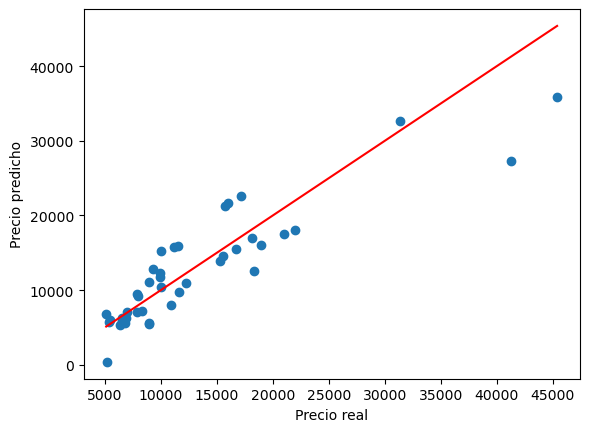

In [69]:
#Entrenamiento de modelo
#Dividimos el dataset en training y test set.
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

#Creamos y entrenamos el modelo de regresión lineal.
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, y_train)

#Calculamos con el modelo los resultados para el dataset de test.
y_pred = lm.predict(X_test)

plt.scatter(y_test.values.ravel(), y_pred)
plt.xlabel("Precio real")
plt.ylabel("Precio predicho")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red")
plt.show()

## Ahora voy a hacerlo con un polinomio

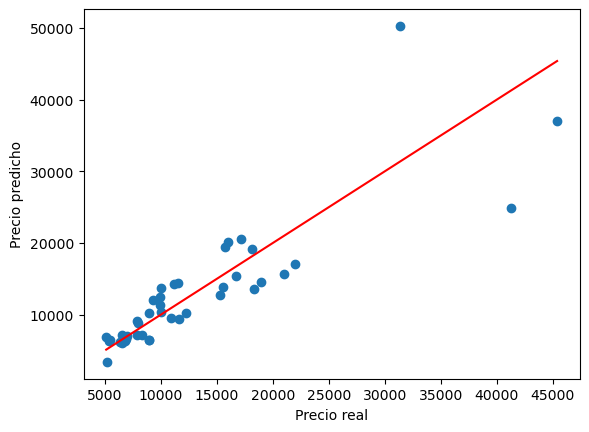

In [75]:
#Vamos a probar con un polinomio de grado 2:

from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2,include_bias=False)
X_poly = poly_features.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size = 0.2, random_state = 0)

# Mostrando gráfica con el polinomio de grado 2:
lm = LinearRegression()
lm.fit(X_train, y_train)

y_pred = lm.predict(X_test)

plt.scatter(y_test.values.ravel(), y_pred)
plt.xlabel("Precio real")
plt.ylabel("Precio predicho")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red")
plt.show()

<div style="border-style:groove;border-width:thin;padding:10px">
El resultado obtenido es 0.87 de R². Está bastante bien. El error cuadrático medio que estamos teniendo en el conjunto de test es de 3100€. Teniendo en cuenta el precio de un coche no parece un error pequeño. Vamos a intentar hacerlo mejor. 
    <p>Si habéis pintado las relaciones entre las distintas columnas habréis visto que hay algunas que parecen tener una relación polinómica con el precio. En concreto de grado 2. Vamos a probar con una regresión polinómica, de nuevo, con todas las columnas.</p>
</div>

<div style="border-style:groove;border-width:thin;padding:10px">
¿Porqué sale tan mal? ¿Es dummy coding oportuno para lo que estamos haciendo?
El dummy encoding da valores de 0 y 1. El problema de estos valores es que 0 y 1 al cuadrado, al cubo, etc. no cambian de valor, luego hacer la regresión polinómica no tiene mucho sentido.
Vamos a probar con un "Simple effect encoding". Las columnas serán iguales pero en vez de valores de 0 y 1 tendremos -0.25 y 0.75. Para lograr esto simplemente restamos 0.25 a todas las columnas que hemos creado:
</div>

<div style="border-style:groove;border-width:thin;padding:10px">
Vamos a volver a hacer la regresión polinómica. A ver si esta vez obtenemos un resultado mejor que con la regresión lineal. La intuición en este caso nos indica que deberíamos obtener un resultado mejor ya que hay algunas variables que tienen relación de grado 2 con el precio.
</div>

<div style="border-style:groove;border-width:thin;padding:10px">
Esta vez el R² es muy bueno y nos estamos equivocando de media 474€ en cada coche, lo cual es un dato de error bastante bueno. 
</div>